In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [19]:
df = pd.read_csv('datasets/data_2d.csv', header=None)
df.head()

,0,1,2
0,17.930201,94.520592,320.259530
1,97.144697,69.593282,404.634472
2,81.775901,5.737648,181.485108
3,55.854342,70.325902,321.773638
4,49.366550,75.114040,322.465486


In [20]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,47.977794,56.271284,265.334490
std,29.776540,30.218386,106.375043
min,1.382983,0.127891,43.915692
25%,21.695463,32.510100,177.063748
50%,48.401451,60.979979,268.342711
75%,72.460241,82.909369,353.787315
max,98.998373,99.957634,466.265806


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [22]:
X = df.iloc[:,:2].values
X = np.concatenate((np.ones((100,1)), X), axis = -1)
X

array([[ 1.        , 17.93020121, 94.52059195],
       [ 1.        , 97.14469719, 69.59328198],
       [ 1.        , 81.77590078,  5.7376481 ],
       [ 1.        , 55.85434242, 70.32590168],
       [ 1.        , 49.36654999, 75.11404016],
       [ 1.        ,  3.19270247, 29.25629886],
       [ 1.        , 49.20078406, 86.14443851],
       [ 1.        , 21.8828039 , 46.8415052 ],
       [ 1.        , 79.50986272, 87.39735554],
       [ 1.        , 88.1538875 , 65.20564193],
       [ 1.        , 60.74385434, 99.9576339 ],
       [ 1.        , 67.41558195, 50.36830961],
       [ 1.        , 48.31811577, 99.12895314],
       [ 1.        , 28.82997197, 87.18494885],
       [ 1.        , 43.85374266, 64.47363908],
       [ 1.        , 25.31369409, 83.54529426],
       [ 1.        , 10.80772667, 45.69556859],
       [ 1.        , 98.36574588, 82.69739353],
       [ 1.        , 29.14690997, 66.36510676],
       [ 1.        , 65.1003019 , 33.3538835 ],
       [ 1.        , 24.64411349, 39.540

In [23]:
Y = df.iloc[:,2].values.reshape(-1,1)
Y.shape

(100, 1)

In [24]:
weights = np.zeros((2,1))
weights

array([[0.],
       [0.]])

In [25]:
weights = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))
weights.shape

(3, 1)

In [26]:
weights

array([[1.46191241],
       [2.01666793],
       [2.96985048]])

In [27]:
Yhat = np.dot(X,weights) 

In [28]:
d1 = Yhat - Y
d2 = Yhat - Y.mean()

In [30]:
r_squared = 1 - (np.sum(d1**2)/np.sum(d2**2))

In [31]:
r_squared

0.9980000695088083

In [34]:
y = np.dot(weights.T,[[1.0],[43.853742664],[64.4736390798]])

In [35]:
y

array([[281.37741721]])

(100, 100)


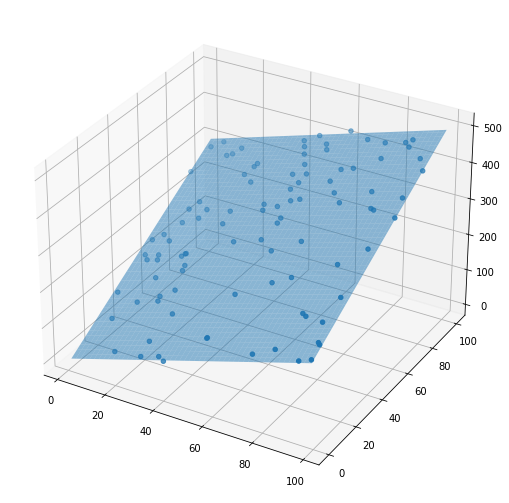

In [62]:
plt.figure(figsize=(9,9))
ax = plt.subplot(111, projection='3d')

ax.scatter(X[:,1], X[:,2],Y)

x, y = np.meshgrid(np.linspace(X[:,1].min(), X[:,1].max(), 100),np.linspace(X[:,2].min(), X[:,2].max(), 100))
print(y.shape)
onlyX = pd.DataFrame({'Feature1': x.ravel(), 'Feature2': y.ravel()})
onlyX = onlyX.values
onlyX = np.concatenate((np.ones((10000,1)), onlyX), axis = -1)
fittedY=np.dot(onlyX,weights) 

ax.plot_surface(x,y,fittedY.reshape(x.shape), alpha=0.5)
plt.show()